In [1]:
import sys
sys.path.append('../')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from config import const


sns.set_theme()
sns_palette = sns.color_palette()
customPalette = sns.set_palette(sns.color_palette(const.colors))

sample = pd.read_pickle(f'../data/processed/time.pickle')

In [3]:
sample['Start_Time']    = pd.to_datetime(sample['Start_Time'])
sample['End_Time']      = pd.to_datetime(sample['End_Time'])
sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 484236 entries, 0 to 499999
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   ID            484236 non-null  object        
 1   Start_Time    484236 non-null  datetime64[ns]
 2   End_Time      484236 non-null  datetime64[ns]
 3   Timezone      483751 non-null  object        
 4   year          484236 non-null  int64         
 5   hour          484236 non-null  int32         
 6   weekday       484236 non-null  int64         
 7   weekday_name  484236 non-null  object        
 8   weekend       484236 non-null  int64         
 9   month         484236 non-null  int32         
 10  day           484236 non-null  int32         
dtypes: datetime64[ns](2), int32(3), int64(3), object(3)
memory usage: 38.8+ MB


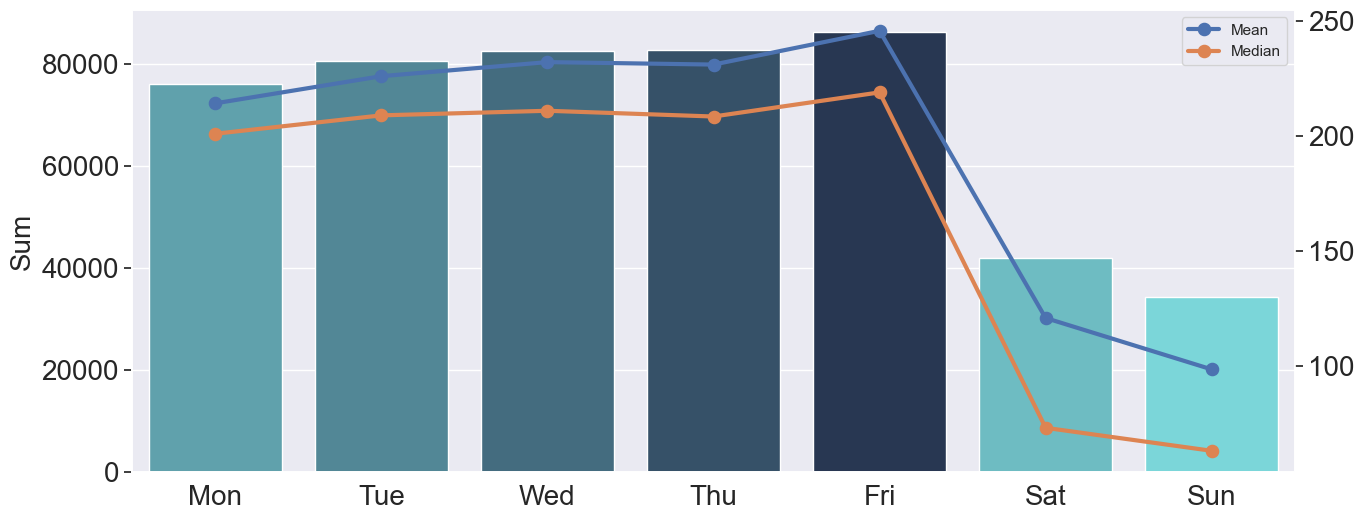

In [4]:
x =(
    sample
    .groupby(['year', 'month', 'day', 'weekday', 'weekday_name'])
    .agg(
        count=('ID', 'count')
    )
    .reset_index()
)
y = (
    x
    .groupby(['weekday', 'weekday_name'])
    .agg(
        sum=('count', 'sum'),
        mean=('count', 'mean'),
        median=('count', 'median'),
    )
    .reset_index()
)
y

fig, ax1 = plt.subplots(figsize=(15,6))

pal = sns.color_palette(f"blend:{const.colors[0]},{const.colors[-1]}", len(y))
pal = pd.Series(pal)
rank = y['sum'].rank(ascending=False, method='first').astype(int) - 1
sns.barplot(x='weekday_name', y='sum', data=y, ax=ax1, palette=pal[::-1][rank].tolist(), hue='weekday_name',legend=False)

ax1.set(xlabel=None, ylabel=None)
ax2= ax1.twinx()
ax2.grid(False)

sns.pointplot(x='weekday_name', y='mean', data=y, marker='o', label='Mean', ax=ax2, linewidth=3, color=sns_palette[0])
sns.pointplot(x='weekday_name', y='median', data=y, marker='o', label='Median', ax=ax2, linewidth=3, color=sns_palette[1])


ax1.set_ylabel('Sum', fontsize=20)
ax1.set_xlabel(None, fontsize=20)

ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)

plt.xlabel('', fontsize=20)
plt.ylabel('', fontsize=20)
plt.show()

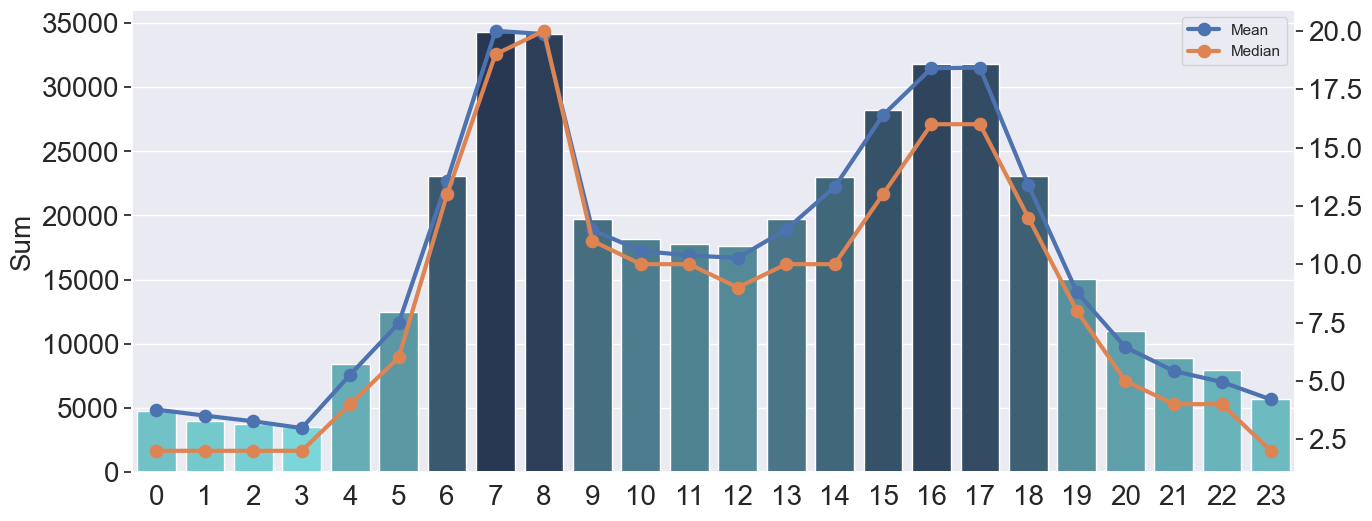

In [5]:
import numpy as np
x =(
    sample[sample['weekend'] == 0]
    .groupby(['year', 'month', 'day', 'weekday', 'hour'])
    .agg(
        count=('ID', 'count')
    )
    .reset_index()
)
y = (
    x
    .groupby(['hour'])
    .agg(
        sum=('count', 'sum'),
        mean=('count', 'mean'),
        median=('count', 'median'),
    )
    .reset_index()
)
y

pal = sns.color_palette(f"blend:{const.colors[0]},{const.colors[-1]}", len(y))
pal = pd.Series(pal)
rank = y['sum'].rank(ascending=False, method='first').astype(int) - 1

fig, ax1 = plt.subplots(figsize=(15,6))
sns.barplot(x='hour', y='sum', data=y, ax=ax1, palette=pal[::-1][rank].tolist(), hue='hour',legend=False)


ax1.set(xlabel=None, ylabel=None)
ax2= ax1.twinx()
ax2.grid(False)

sns.set(rc={'figure.figsize':(15,6)})
sns.pointplot(data=y, x='hour', y='mean', label='Mean', marker='o', linewidth=3, ax=ax2, color=sns_palette[0])
sns.pointplot(data=y, x='hour', y='median', label='Median', marker='o', linewidth=3, ax=ax2, color=sns_palette[1])

ax1.set_ylabel('Sum', fontsize=20)

ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)

plt.xlabel('', fontsize=20)
plt.ylabel('', fontsize=20)
plt.show()

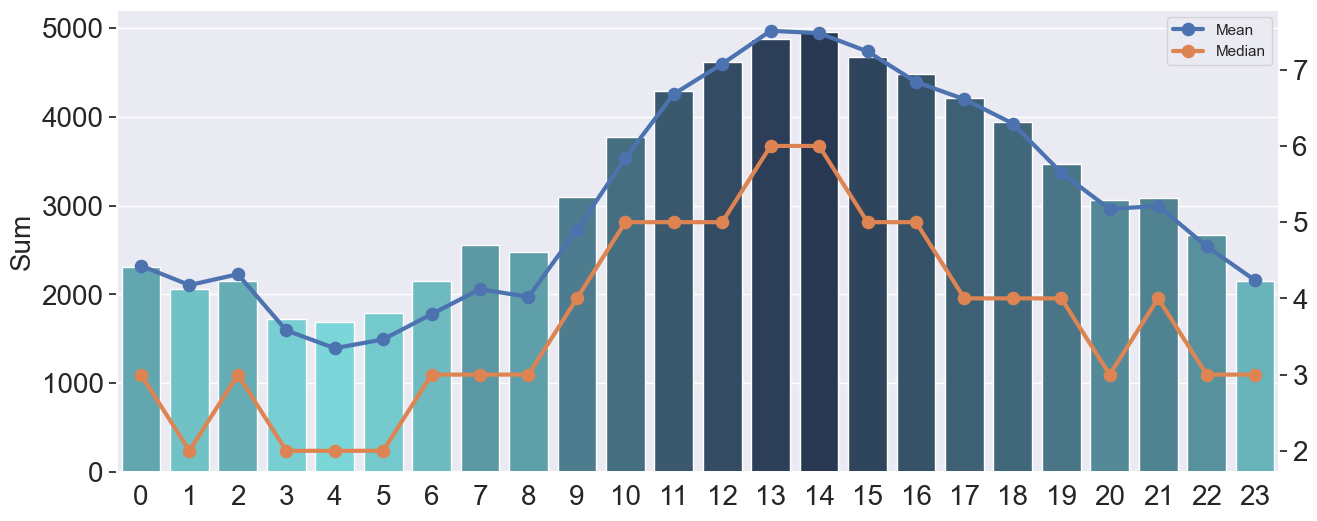

In [6]:
import numpy as np
x =(
    sample[sample['weekend'] == 1]
    .groupby(['year', 'month', 'day', 'weekday', 'hour'])
    .agg(
        count=('ID', 'count')
    )
    .reset_index()
)
y = (
    x
    .groupby(['hour'])
    .agg(
        sum=('count', 'sum'),
        mean=('count', 'mean'),
        median=('count', 'median'),
    )
    .reset_index()
)
y

pal = sns.color_palette(f"blend:{const.colors[0]},{const.colors[-1]}", len(y))
pal = pd.Series(pal)
rank = y['sum'].rank(ascending=False, method='first').astype(int) - 1

fig, ax1 = plt.subplots(figsize=(15,6))
sns.barplot(x='hour', y='sum', data=y, ax=ax1, palette=pal[::-1][rank].tolist(), hue='hour',legend=False)


ax1.set(xlabel=None, ylabel=None)
ax2= ax1.twinx()
ax2.grid(False)

sns.set(rc={'figure.figsize':(15,6)})
sns.pointplot(data=y, x='hour', y='mean', label='Mean', marker='o', linewidth=3, ax=ax2, color=sns_palette[0])
sns.pointplot(data=y, x='hour', y='median', label='Median', marker='o', linewidth=3, ax=ax2, color=sns_palette[1])

ax1.set_ylabel('Sum', fontsize=20)

ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)

plt.xlabel('', fontsize=20)
plt.ylabel('', fontsize=20)
plt.show()

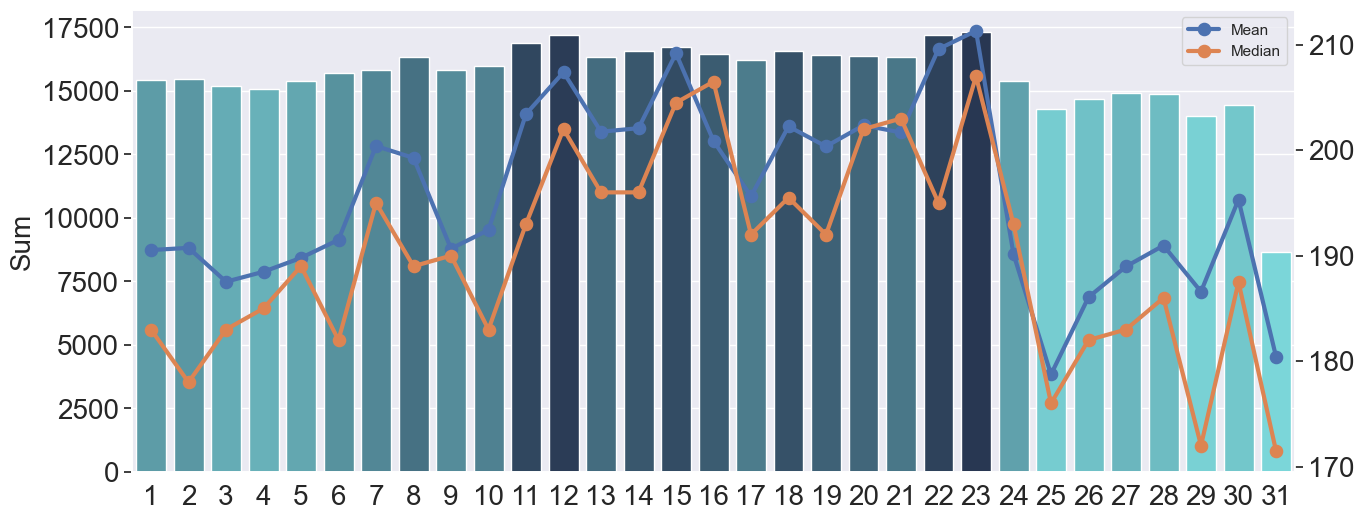

In [7]:
import numpy as np
x =(
    sample
    .groupby(['year', 'month', 'day'])
    .agg(
        count=('ID', 'count')
    )
    .reset_index()
)
y = (
    x
    .groupby(['day'])
    .agg(
        sum=('count', 'sum'),
        mean=('count', 'mean'),
        median=('count', 'median'),
    )
    .reset_index()
)
y

pal = sns.color_palette(f"blend:{const.colors[0]},{const.colors[-1]}", len(y))
pal = pd.Series(pal)
rank = y['sum'].rank(ascending=False, method='first').astype(int) - 1

fig, ax1 = plt.subplots(figsize=(15,6))
sns.barplot(x='day', y='sum', data=y, ax=ax1, palette=pal[::-1][rank].tolist(), hue='day',legend=False)


ax1.set(xlabel=None, ylabel=None)
ax2= ax1.twinx()
ax2.grid(False)

sns.set(rc={'figure.figsize':(15,6)})
sns.pointplot(data=y, x='day', y='mean', label='Mean', marker='o', linewidth=3, ax=ax2, color=sns_palette[0])
sns.pointplot(data=y, x='day', y='median', label='Median', marker='o', linewidth=3, ax=ax2, color=sns_palette[1])

ax1.set_ylabel('Sum', fontsize=20)

ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)

plt.xlabel('', fontsize=20)
plt.ylabel('', fontsize=20)
plt.show()

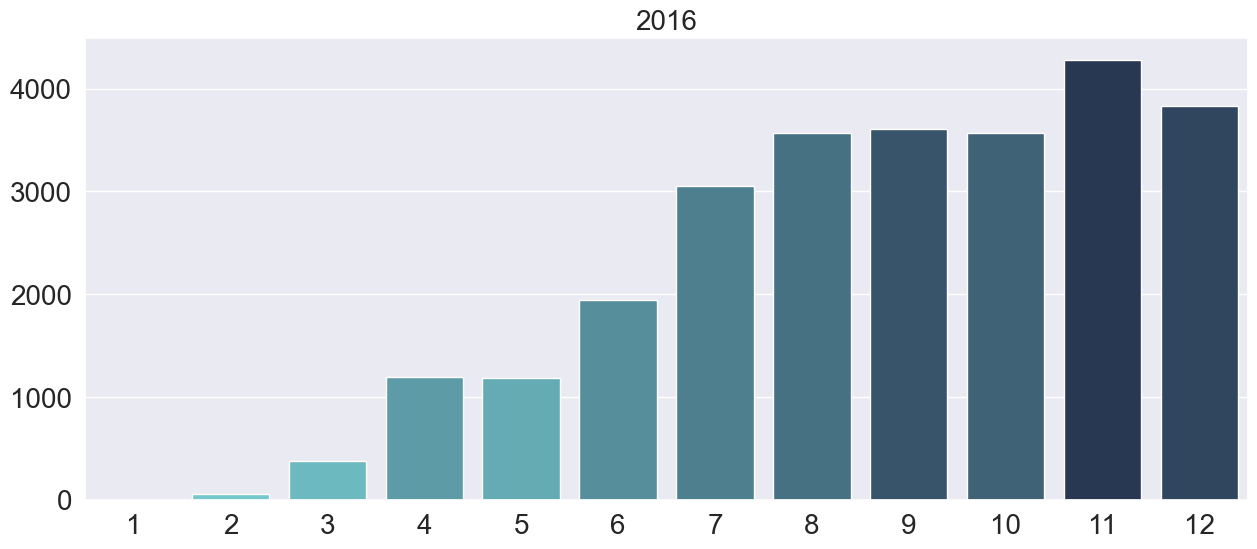

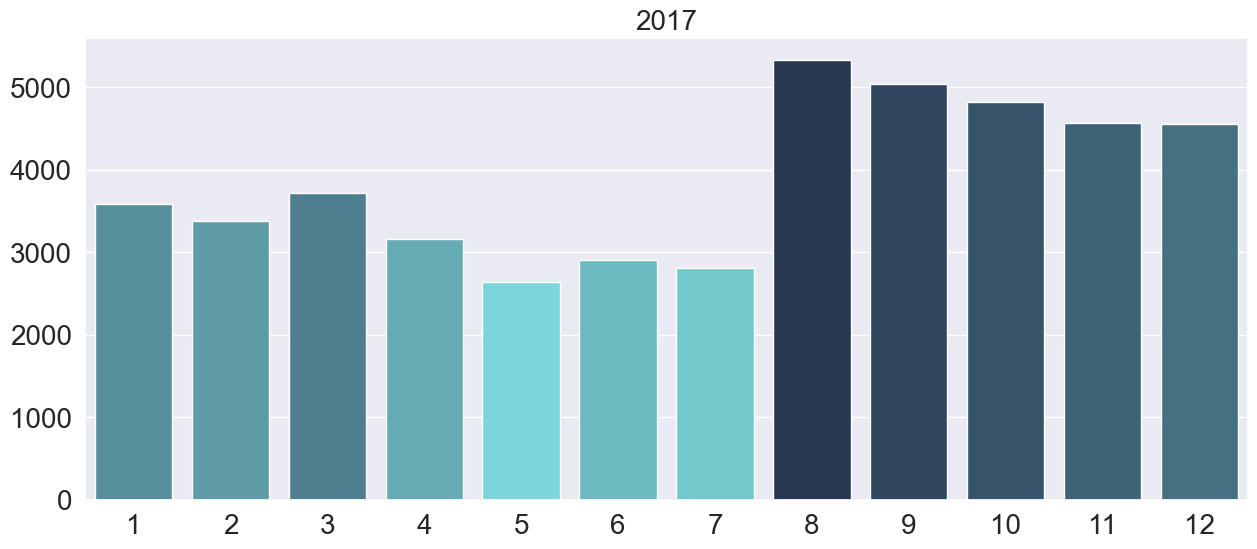

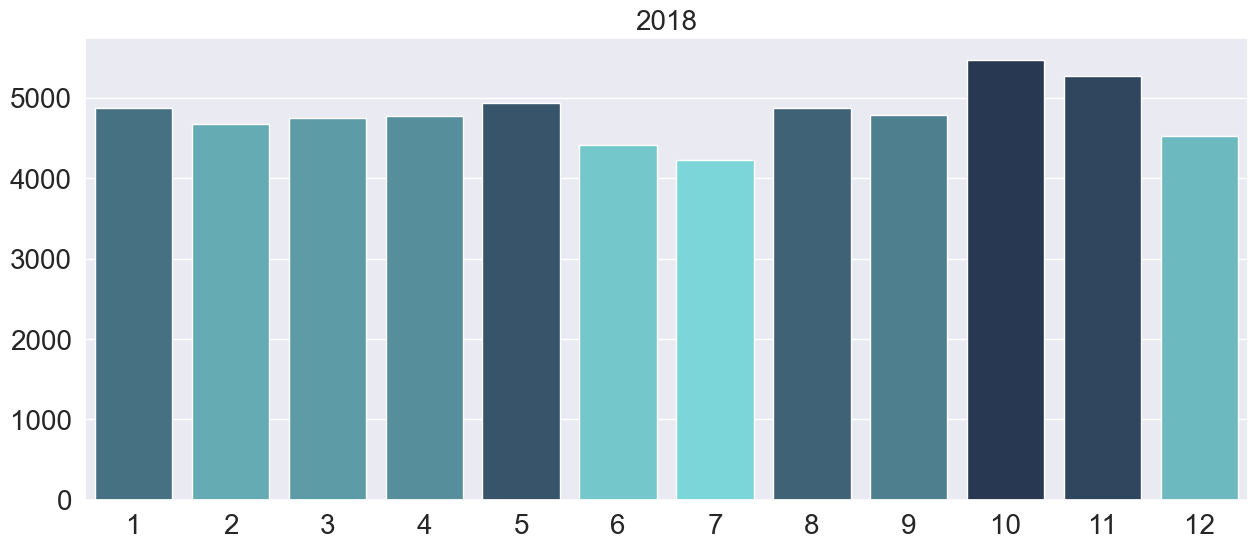

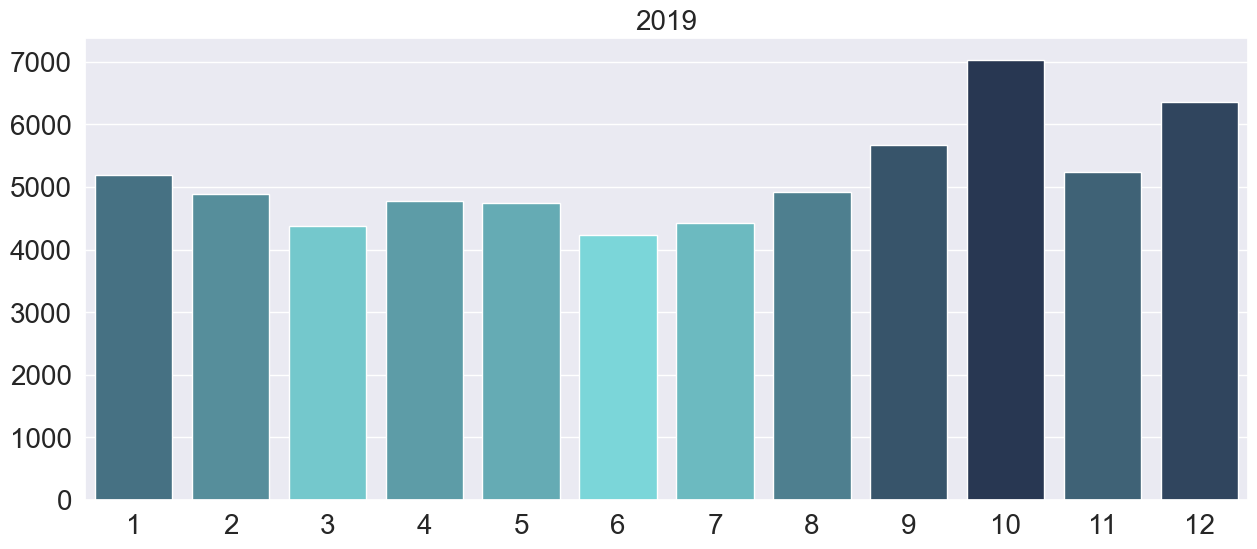

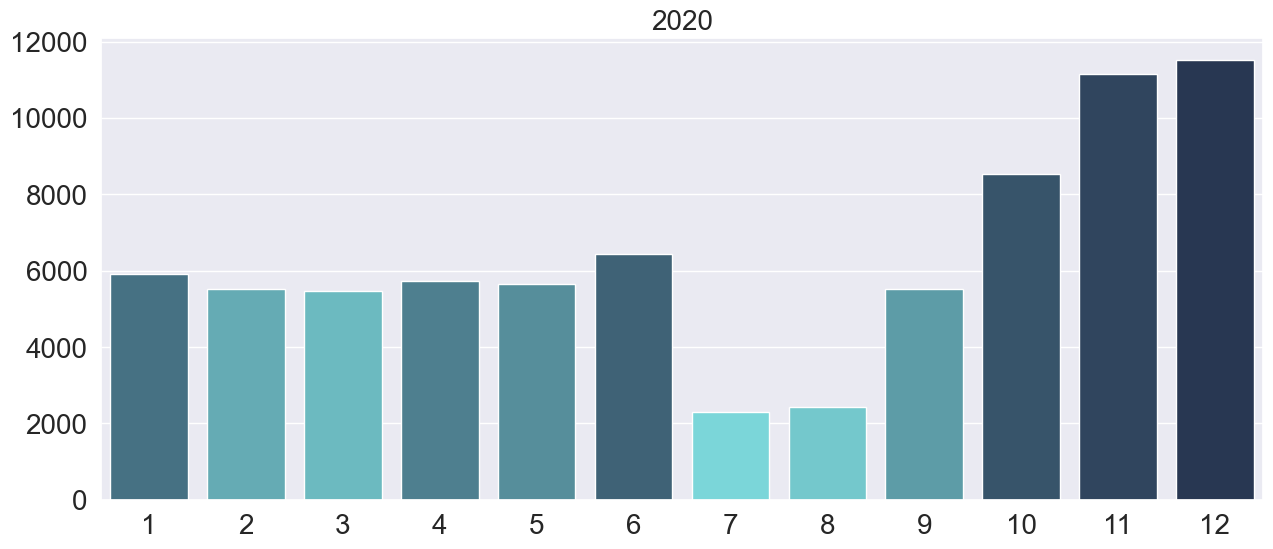

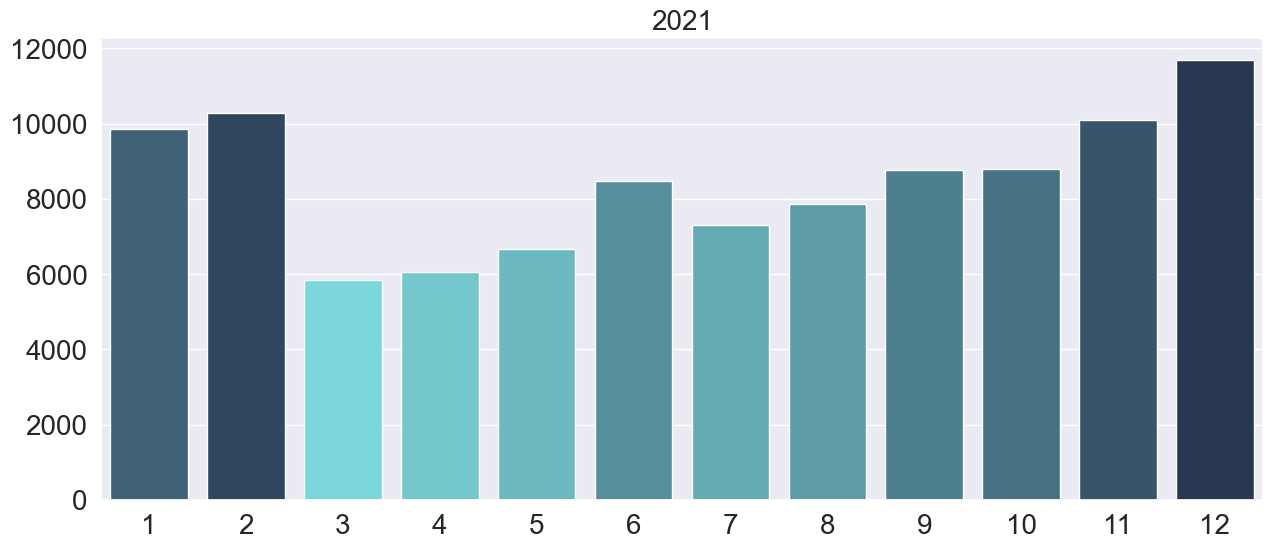

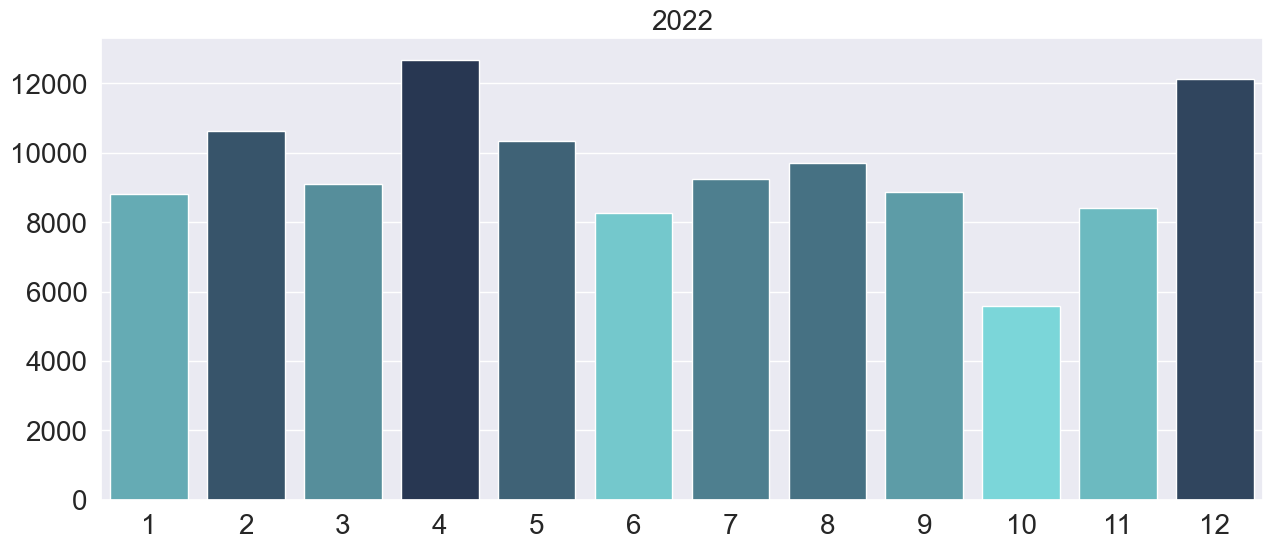

In [8]:
x =(
    sample
    .groupby(['year', 'month'])
    .agg(
        count=('ID', 'count')
    )
    .reset_index()
)
years = x['year'].drop_duplicates().sort_values().tolist()


for year in years:
    y = (
        x[x['year'] == year]
        .groupby(['month'])
        .agg(
            sum=('count', 'sum'),
        )
        .reset_index()
    )
    rank = y['sum'].rank(ascending=False, method='first').astype(int) - 1

    pal = sns.color_palette(f"blend:{const.colors[0]},{const.colors[-1]}", len(y))
    pal = pd.Series(pal)
    fig, ax1 = plt.subplots(figsize=(15,6))
    sns.barplot(x='month', y='sum', data=y, ax=ax1, palette=pal[::-1][rank].tolist(), hue='month',legend=False)

    ax1.set(xlabel=None, ylabel=None)

    ax1.tick_params(axis='x', labelsize=20)
    ax1.tick_params(axis='y', labelsize=20)
    ax1.set_title(f"{year}", fontsize=20)

    plt.xlabel('')
    plt.ylabel('', fontsize=20)
    plt.show()